# Libaries

In [1]:
%%capture
!pip install transformers
!pip install tensorflow-text
!pip install tf-models-official

In [2]:
import pickle
import numpy as np
import pandas as pd
import random
from google.colab import drive 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Activation, Dropout
from tensorflow.keras.layers import Conv1D, Embedding, GlobalAveragePooling1D 
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

# Data

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

# Load the data from a pickle file
drive_path = 'gdrive/My Drive/DTU/Meme Understanding using Computer Vision and NLP/Data/archive.zip (Unzipped Files)/memotion_dataset_7k'

with open(drive_path + '/data_task3_big_balance_corrected.pickle', 'rb') as f: 
    data = pickle.load(f)

with open(drive_path + '/data_test.pickle', 'rb') as f: 
    data_test = pickle.load(f)

X_img_train, X_text_train,y_train_sentiment,y_train_humour,y_train_sarcasm,y_train_offensive,y_train_motivational = data

X_img_test, X_text_test, y_test_sentiment,y_test_humour, y_test_sarcasm,y_test_offensive, y_test_motivational = data_test
X_img_test_c=X_img_test
X_text_test_c=X_text_test

# n=10000
# X_img_train=X_img_train[:n,:,:]
# X_text_train=X_text_train[:n]
# target_sentiment_train=target_sentiment[:n]
# target_humour_train=target_humour[:n]
# target_sarcasm_train=target_sarcasm[:n]
# target_offensive_train=target_offensive[:n]
# target_motivational_train=target_motivational[:n]
# print(X_img.shape)
# print(X_text_corrected.shape)


# X_img_test, X_text_test, y_test_sentiment,y_test_humour, y_test_sarcasm,y_test_offensive, y_test_motivational

Mounted at /content/gdrive


In [6]:
(X_img_test, X_img_val, 
X_text_test, X_text_val, 
y_test_sentiment, y_val_sentiment,
y_test_humour, y_val_humour, 
y_test_sarcasm, y_val_sarcasm,
y_test_offensive, y_val_offensive,
y_test_motivational, y_val_motivational) = train_test_split(X_img_test, X_text_test, y_test_sentiment,y_test_humour, y_test_sarcasm,y_test_offensive, y_test_motivational, test_size=0.1)

# one-hot encoding sentiment
enc_sentiment = OneHotEncoder()
enc_sentiment.fit(y_train_sentiment.reshape(-1, 1))
categories_sentiment=enc_sentiment.categories_
y_train_sentiment=(enc_sentiment.transform(y_train_sentiment.reshape(-1, 1))).toarray()
y_test_sentiment=(enc_sentiment.transform(y_test_sentiment.reshape(-1, 1))).toarray()
y_val_sentiment=(enc_sentiment.transform(y_val_sentiment.reshape(-1, 1))).toarray()

# one-hot encoding humour
enc_humour = OneHotEncoder()
enc_humour.fit(y_train_humour.reshape(-1, 1))
categories_humour=enc_humour.categories_
y_train_humour=(enc_humour.transform(y_train_humour.reshape(-1, 1))).toarray()
y_test_humour=(enc_humour.transform(y_test_humour.reshape(-1, 1))).toarray()
y_val_humour=(enc_humour.transform(y_val_humour.reshape(-1, 1))).toarray()

# one-hot encoding sarcasm
enc_sarcasm = OneHotEncoder()
enc_sarcasm.fit(y_train_sarcasm.reshape(-1, 1))
categories_sarcasm=enc_sarcasm.categories_
y_train_sarcasm=(enc_sarcasm.transform(y_train_sarcasm.reshape(-1, 1))).toarray()
y_test_sarcasm=(enc_sarcasm.transform(y_test_sarcasm.reshape(-1, 1))).toarray()
y_val_sarcasm=(enc_sarcasm.transform(y_val_sarcasm.reshape(-1, 1))).toarray()

# one-hot encoding offensive
enc_offensive = OneHotEncoder()
enc_offensive.fit(y_train_offensive.reshape(-1, 1))
categories_offensive=enc_offensive.categories_
y_train_offensive=(enc_offensive.transform(y_train_offensive.reshape(-1, 1))).toarray()
y_test_offensive=(enc_offensive.transform(y_test_offensive.reshape(-1, 1))).toarray()
y_val_offensive=(enc_offensive.transform(y_val_offensive.reshape(-1, 1))).toarray()

# one-hot encoding motivational
enc_motivational = OneHotEncoder()
enc_motivational.fit(y_train_motivational.reshape(-1, 1))
categories_motivational=enc_motivational.categories_
y_train_motivational=(enc_motivational.transform(y_train_motivational.reshape(-1, 1))).toarray()
y_test_motivational=(enc_motivational.transform(y_test_motivational.reshape(-1, 1))).toarray()
y_val_motivational=(enc_motivational.transform(y_val_motivational.reshape(-1, 1))).toarray()

print('Image data:')
print(X_img_train.shape)
print(X_img_test.shape)
print(X_img_val.shape)

print('Text data:')
print(X_text_train.shape)
print(X_text_test.shape)
print(X_text_val.shape)

print('Target data sentiment:')
print(y_train_sentiment.shape)
print(y_test_sentiment.shape)
print(y_val_sentiment.shape)

print('Target data humour:')
print(y_train_humour.shape)
print(y_test_humour.shape)
print(y_val_humour.shape)

print('Target data offensive:')
print(y_train_offensive.shape)
print(y_test_offensive.shape)
print(y_val_offensive.shape)

print('Target data sarcasm:')
print(y_train_sarcasm.shape)
print(y_test_sarcasm.shape)
print(y_val_sarcasm.shape)

print('Target data motivational:')
print(y_train_motivational.shape)
print(y_test_motivational.shape)
print(y_val_motivational.shape)

Image data:
(19620, 100, 100, 3)
(1695, 100, 100, 3)
(189, 100, 100, 3)
Text data:
(19620,)
(1695,)
(189,)
Target data sentiment:
(19620, 3)
(1695, 3)
(189, 3)
Target data humour:
(19620, 4)
(1695, 4)
(189, 4)
Target data offensive:
(19620, 3)
(1695, 3)
(189, 3)
Target data sarcasm:
(19620, 3)
(1695, 3)
(189, 3)
Target data motivational:
(19620, 2)
(1695, 2)
(189, 2)


# Image Model

In [10]:
base_model_1 = tf.keras.applications.ResNet50(input_shape=X_img_train[0].shape,include_top=False,weights='imagenet')

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomContrast([.5,2]),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

preprocess_input = tf.keras.applications.resnet_v2.preprocess_input
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [11]:
def image_model():
  #Input
  image_input = tf.keras.Input(shape=(100, 100, 3), name = 'image_input')

  #Pre proccs
  pre_proccs = data_augmentation(image_input)
  pre_proccs = preprocess_input(pre_proccs)

  #Resnet
  layer_bm_1 = base_model_1(pre_proccs, training=True)

  #Net
  net1 = GlobalAveragePooling2D()(layer_bm_1)
  net1 = Dense(512*6)(net1)
  return image_input, net1

image_input, image_layers = image_model()    

# Text Model

In [12]:
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2'
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
bert_model = hub.KerasLayer(tfhub_handle_encoder,trainable=True)

In [13]:
def text_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text_input')
  
  #Preprocess
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)

  #Bert encoder
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)

  #Output
  text_layers = tf.keras.layers.Dense(512)(outputs['pooled_output'])
  return text_input, text_layers

text_input, text_layers = text_model()

# Final Model

In [14]:
def model(layer_1, layer_2, image_input, text_input):
  layer_1 = tf.keras.layers.Dense(512)(layer_1)
  net1 = tf.keras.layers.concatenate([layer_1, layer_2], axis=1)

  #Predictions
  predictions_sentiment = tf.keras.layers.Dense(y_train_sentiment.shape[1], activation='softmax', name = 'predictions_sentiment')(net1)
  predictions_humour = tf.keras.layers.Dense(y_train_humour.shape[1], activation='softmax', name = 'predictions_humour')(net1)
  predictions_sarcasm = tf.keras.layers.Dense(y_train_sarcasm.shape[1], activation='softmax', name = 'predictions_sarcasm')(net1)
  predictions_offensive = tf.keras.layers.Dense(y_train_offensive.shape[1], activation='softmax', name = 'predictions_offensive')(net1)

  model = tf.keras.Model(inputs = [image_input, text_input] , outputs = (predictions_sentiment,predictions_humour, predictions_sarcasm,predictions_offensive))     
    
  return model

model = model(image_layers, text_layers, image_input, text_input)

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss = 'categorical_crossentropy',metrics=['binary_accuracy', 'accuracy'])
history = model.fit(x = {"image_input": X_img_train, "text_input": X_text_train},
                    y = (y_train_sentiment,y_train_humour,y_train_sarcasm,y_train_offensive),
                    validation_data=({"image_input": X_img_val, "text_input": X_text_val},(y_val_sentiment,y_val_humour,y_val_sarcasm,y_val_offensive)),
                    batch_size=256,epochs=30)

Epoch 1/30
77/77 [==============================] - 240s 3s/step - loss: 4.1244 - predictions_sentiment_loss: 0.9778 - predictions_humour_loss: 1.2096 - predictions_sarcasm_loss: 0.9656 - predictions_offensive_loss: 0.9715 - predictions_sentiment_binary_accuracy: 0.7115 - predictions_sentiment_accuracy: 0.5195 - predictions_humour_binary_accuracy: 0.7733 - predictions_humour_accuracy: 0.4506 - predictions_sarcasm_binary_accuracy: 0.7102 - predictions_sarcasm_accuracy: 0.5208 - predictions_offensive_binary_accuracy: 0.7106 - predictions_offensive_accuracy: 0.5173 - val_loss: 6.4968 - val_predictions_sentiment_loss: 1.5290 - val_predictions_humour_loss: 2.0993 - val_predictions_sarcasm_loss: 1.3217 - val_predictions_offensive_loss: 1.5468 - val_predictions_sentiment_binary_accuracy: 0.5379 - val_predictions_sentiment_accuracy: 0.2751 - val_predictions_humour_binary_accuracy: 0.6984 - val_predictions_humour_accuracy: 0.2646 - val_predictions_sarcasm_binary_accuracy: 0.6085 - val_predictio

# Model Eval

## Confusion Matrix + Report

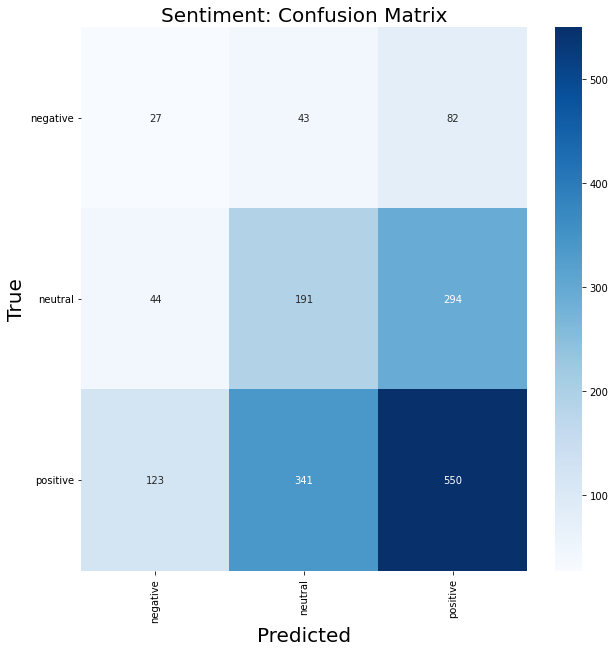

              precision    recall  f1-score   support

    negative       0.14      0.18      0.16       152
     neutral       0.33      0.36      0.35       529
    positive       0.59      0.54      0.57      1014

    accuracy                           0.45      1695
   macro avg       0.36      0.36      0.36      1695
weighted avg       0.47      0.45      0.46      1695



In [16]:
cm = confusion_matrix(enc_sentiment.inverse_transform(y_test_sentiment), enc_sentiment.inverse_transform(model.predict(x = {"image_input": X_img_test, "text_input": X_text_test})[0]))

# Plot confusion matrix
fig = plt.figure(figsize=(10, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g',cmap='Blues'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(enc_sentiment.categories_[0], fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(enc_sentiment.categories_[0], fontsize = 10)
plt.yticks(rotation=0)

plt.title('Sentiment: Confusion Matrix', fontsize=20)

plt.show()

print(classification_report(enc_sentiment.inverse_transform(y_test_sentiment), enc_sentiment.inverse_transform(model.predict(x = {"image_input": X_img_test, "text_input": X_text_test})[0])))

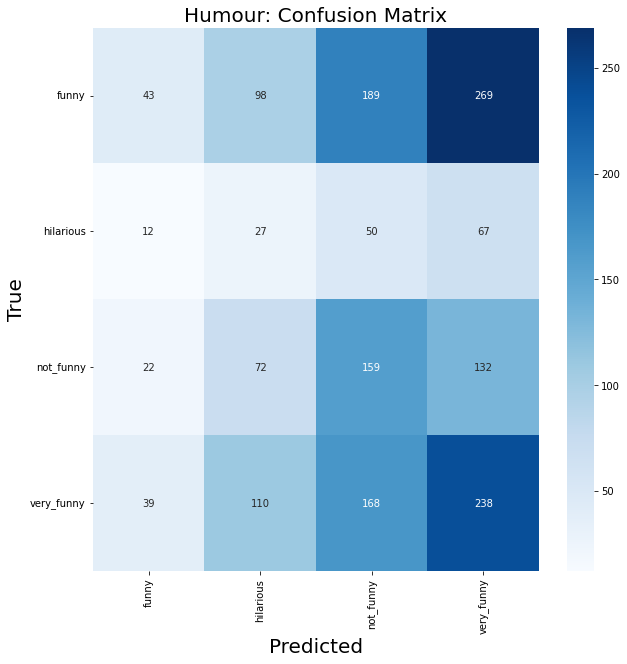

              precision    recall  f1-score   support

       funny       0.37      0.07      0.12       599
   hilarious       0.09      0.17      0.12       156
   not_funny       0.28      0.41      0.33       385
  very_funny       0.34      0.43      0.38       555

    accuracy                           0.28      1695
   macro avg       0.27      0.27      0.24      1695
weighted avg       0.31      0.28      0.25      1695



In [17]:
cm = confusion_matrix(enc_humour.inverse_transform(y_test_humour), enc_humour.inverse_transform(model.predict(x = {"image_input": X_img_test, "text_input": X_text_test})[1]))

# Plot confusion matrix
fig = plt.figure(figsize=(10, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g',cmap='Blues'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(enc_humour.categories_[0], fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(enc_humour.categories_[0], fontsize = 10)
plt.yticks(rotation=0)

plt.title('Humour: Confusion Matrix', fontsize=20)

plt.show() 

print(classification_report(enc_humour.inverse_transform(y_test_humour), enc_humour.inverse_transform(model.predict(x = {"image_input": X_img_test, "text_input": X_text_test})[1])))

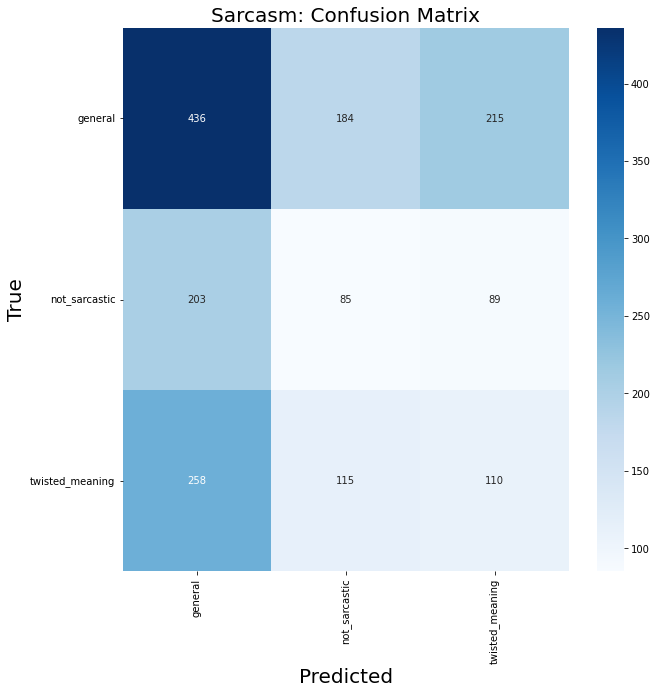

                 precision    recall  f1-score   support

        general       0.49      0.52      0.50       835
  not_sarcastic       0.22      0.23      0.22       377
twisted_meaning       0.27      0.23      0.25       483

       accuracy                           0.37      1695
      macro avg       0.32      0.33      0.32      1695
   weighted avg       0.36      0.37      0.37      1695



In [18]:
cm = confusion_matrix(enc_sarcasm.inverse_transform(y_test_sarcasm), enc_sarcasm.inverse_transform(model.predict(x = {"image_input": X_img_test, "text_input": X_text_test})[2]))

# Plot confusion matrix
fig = plt.figure(figsize=(10, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g',cmap='Blues'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(enc_sarcasm.categories_[0], fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(enc_sarcasm.categories_[0], fontsize = 10)
plt.yticks(rotation=0)

plt.title('Sarcasm: Confusion Matrix', fontsize=20)

plt.show() 
print(classification_report(enc_sarcasm.inverse_transform(y_test_sarcasm), enc_sarcasm.inverse_transform(model.predict(x = {"image_input": X_img_test, "text_input": X_text_test})[2])))

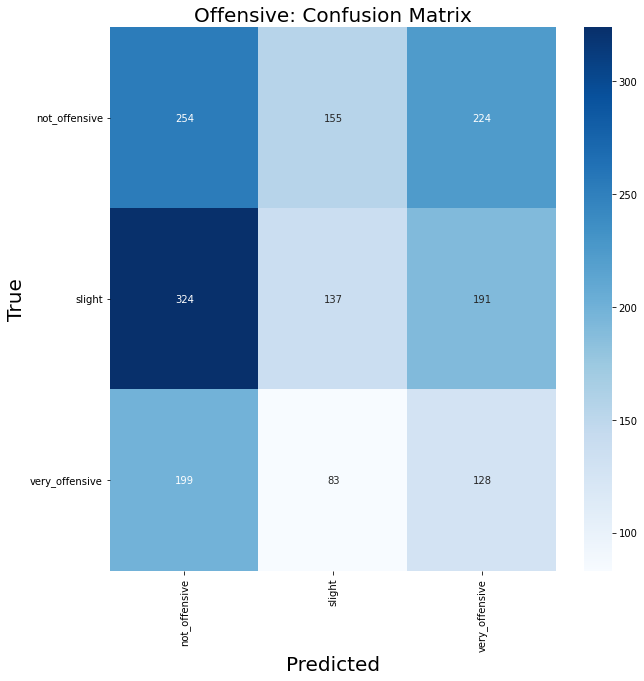

                precision    recall  f1-score   support

 not_offensive       0.33      0.40      0.36       633
        slight       0.37      0.21      0.27       652
very_offensive       0.24      0.31      0.27       410

      accuracy                           0.31      1695
     macro avg       0.31      0.31      0.30      1695
  weighted avg       0.32      0.31      0.30      1695



In [19]:
cm = confusion_matrix(enc_offensive.inverse_transform(y_test_offensive), enc_offensive.inverse_transform(model.predict(x = {"image_input": X_img_test, "text_input": X_text_test})[3]))

# Plot confusion matrix
fig = plt.figure(figsize=(10, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g',cmap='Blues'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(enc_offensive.categories_[0], fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(enc_offensive.categories_[0], fontsize = 10)
plt.yticks(rotation=0)

plt.title('Offensive: Confusion Matrix', fontsize=20)

plt.show() 

print(classification_report(enc_offensive.inverse_transform(y_test_offensive), enc_offensive.inverse_transform(model.predict(x = {"image_input": X_img_test, "text_input": X_text_test})[3])))

## Model

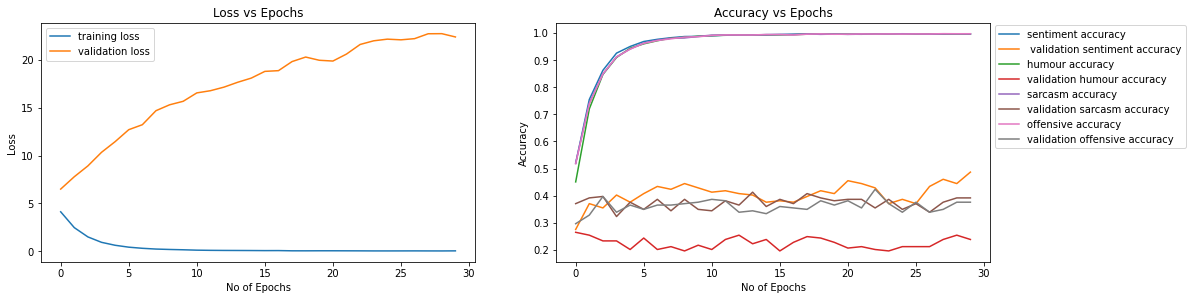

In [20]:
df_history = pd.DataFrame(history.history)
fig, axes = plt.subplots(1,2, figsize=(15, 5))
fig.tight_layout(pad=5.0)

axes[0].plot(df_history.loss, label = "training loss")
axes[0].plot(df_history.val_loss, label = "validation loss")
axes[0].set_xlabel('No of Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss vs Epochs')   
axes[0].legend()

axes[1].plot(df_history.predictions_sentiment_accuracy,label = "sentiment accuracy")
axes[1].plot(df_history.val_predictions_sentiment_accuracy,label = " validation sentiment accuracy")
axes[1].plot(df_history.predictions_humour_accuracy,label = "humour accuracy")
axes[1].plot(df_history.val_predictions_humour_accuracy,label = "validation humour accuracy")
axes[1].plot(df_history.predictions_sarcasm_accuracy,label = "sarcasm accuracy")
axes[1].plot(df_history.val_predictions_sarcasm_accuracy,label = "validation sarcasm accuracy")
axes[1].plot(df_history.predictions_offensive_accuracy,label = "offensive accuracy")
axes[1].plot(df_history.val_predictions_offensive_accuracy,label = "validation offensive accuracy")

axes[1].set_xlabel('No of Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy vs Epochs')
axes[1].legend(bbox_to_anchor=(1.0, 1.01))
plt.show()

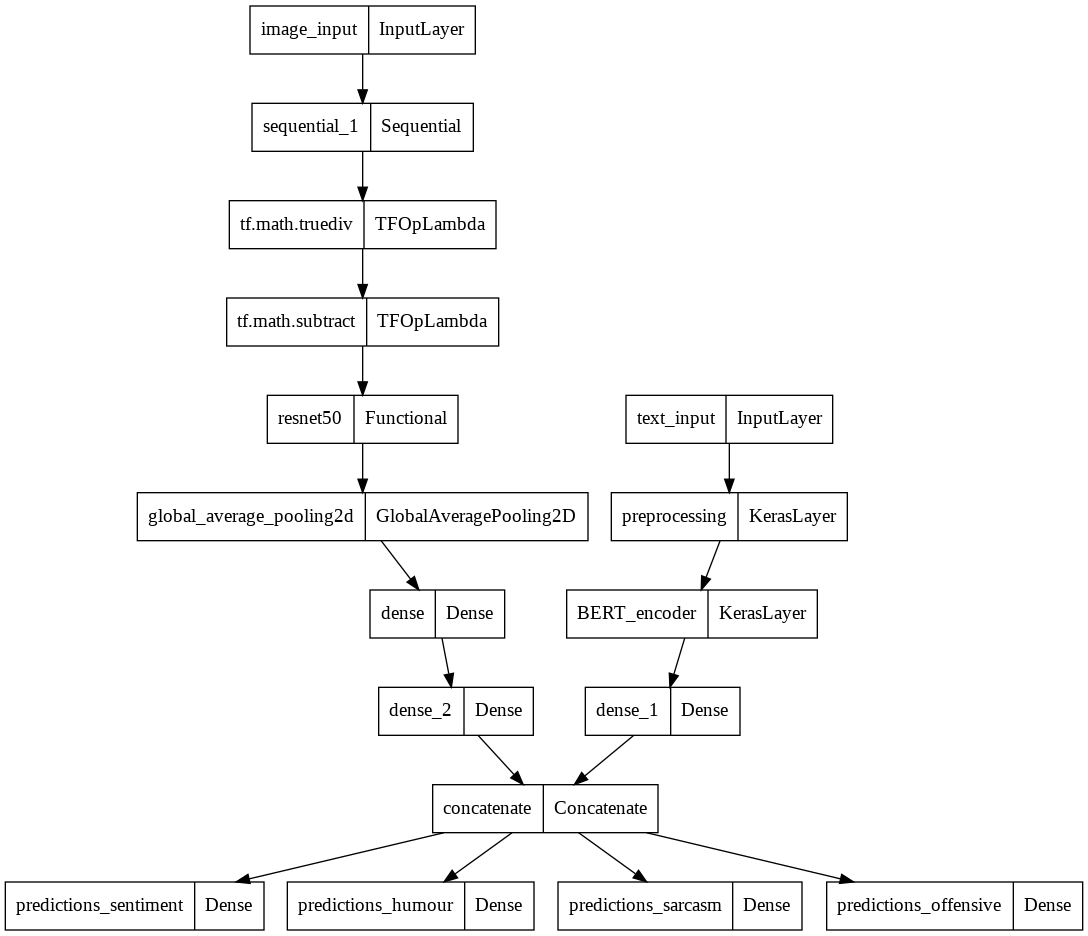

In [21]:
tf.keras.utils.plot_model(model, "model.png", show_shapes=False)

# Prediction 

In [1]:
model

NameError: ignored